In [1]:
# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

2023-06-28 20:21:56.510071: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 20:21:57.426931: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Import dataset
train_df=pd.read_csv('/home/anil/Music/data/sales_train_validation.csv')

# Reduce memory size

In [3]:
def downcast_dtypes(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    int_cols = [c for c in df if df[c].dtype in ["int64", "int32"]]
    df[float_cols] = df[float_cols].astype(np.float32)
    df[int_cols] = df[int_cols].astype(np.int16)
    return df

# Before Downcasting

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB


In [5]:
train_df=downcast_dtypes(train_df)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int16(1913), object(6)
memory usage: 112.6+ MB


# Dataset Creation

In [7]:
train_df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [8]:
train_df = train_df.T

In [9]:
train_df = train_df[6:] # because we need only sales 

In [10]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
d_1,0,0,0,0,0,0,0,12,2,0,...,0,14,1,0,4,0,0,0,0,0
d_2,0,0,0,0,0,0,0,15,0,0,...,0,11,1,0,4,0,0,6,0,0
d_3,0,0,0,0,0,0,0,0,7,1,...,0,5,1,0,2,2,0,0,0,0
d_4,0,0,0,0,0,0,0,0,3,0,...,0,6,1,0,5,2,0,2,0,0
d_5,0,0,0,0,0,0,0,0,0,0,...,0,5,1,0,2,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_1909,1,1,1,0,1,0,1,4,0,0,...,4,1,1,0,0,0,0,1,1,0
d_1910,3,0,0,1,2,0,0,6,0,0,...,2,3,3,0,2,1,0,0,0,0
d_1911,0,0,1,3,2,2,0,3,0,2,...,0,1,6,0,3,0,0,0,3,0
d_1912,1,0,1,7,2,0,1,2,0,0,...,3,0,0,4,2,0,1,1,1,0


# data scaling

In [11]:
sc = MinMaxScaler(feature_range = (0, 1))
train_df = sc.fit_transform(train_df)

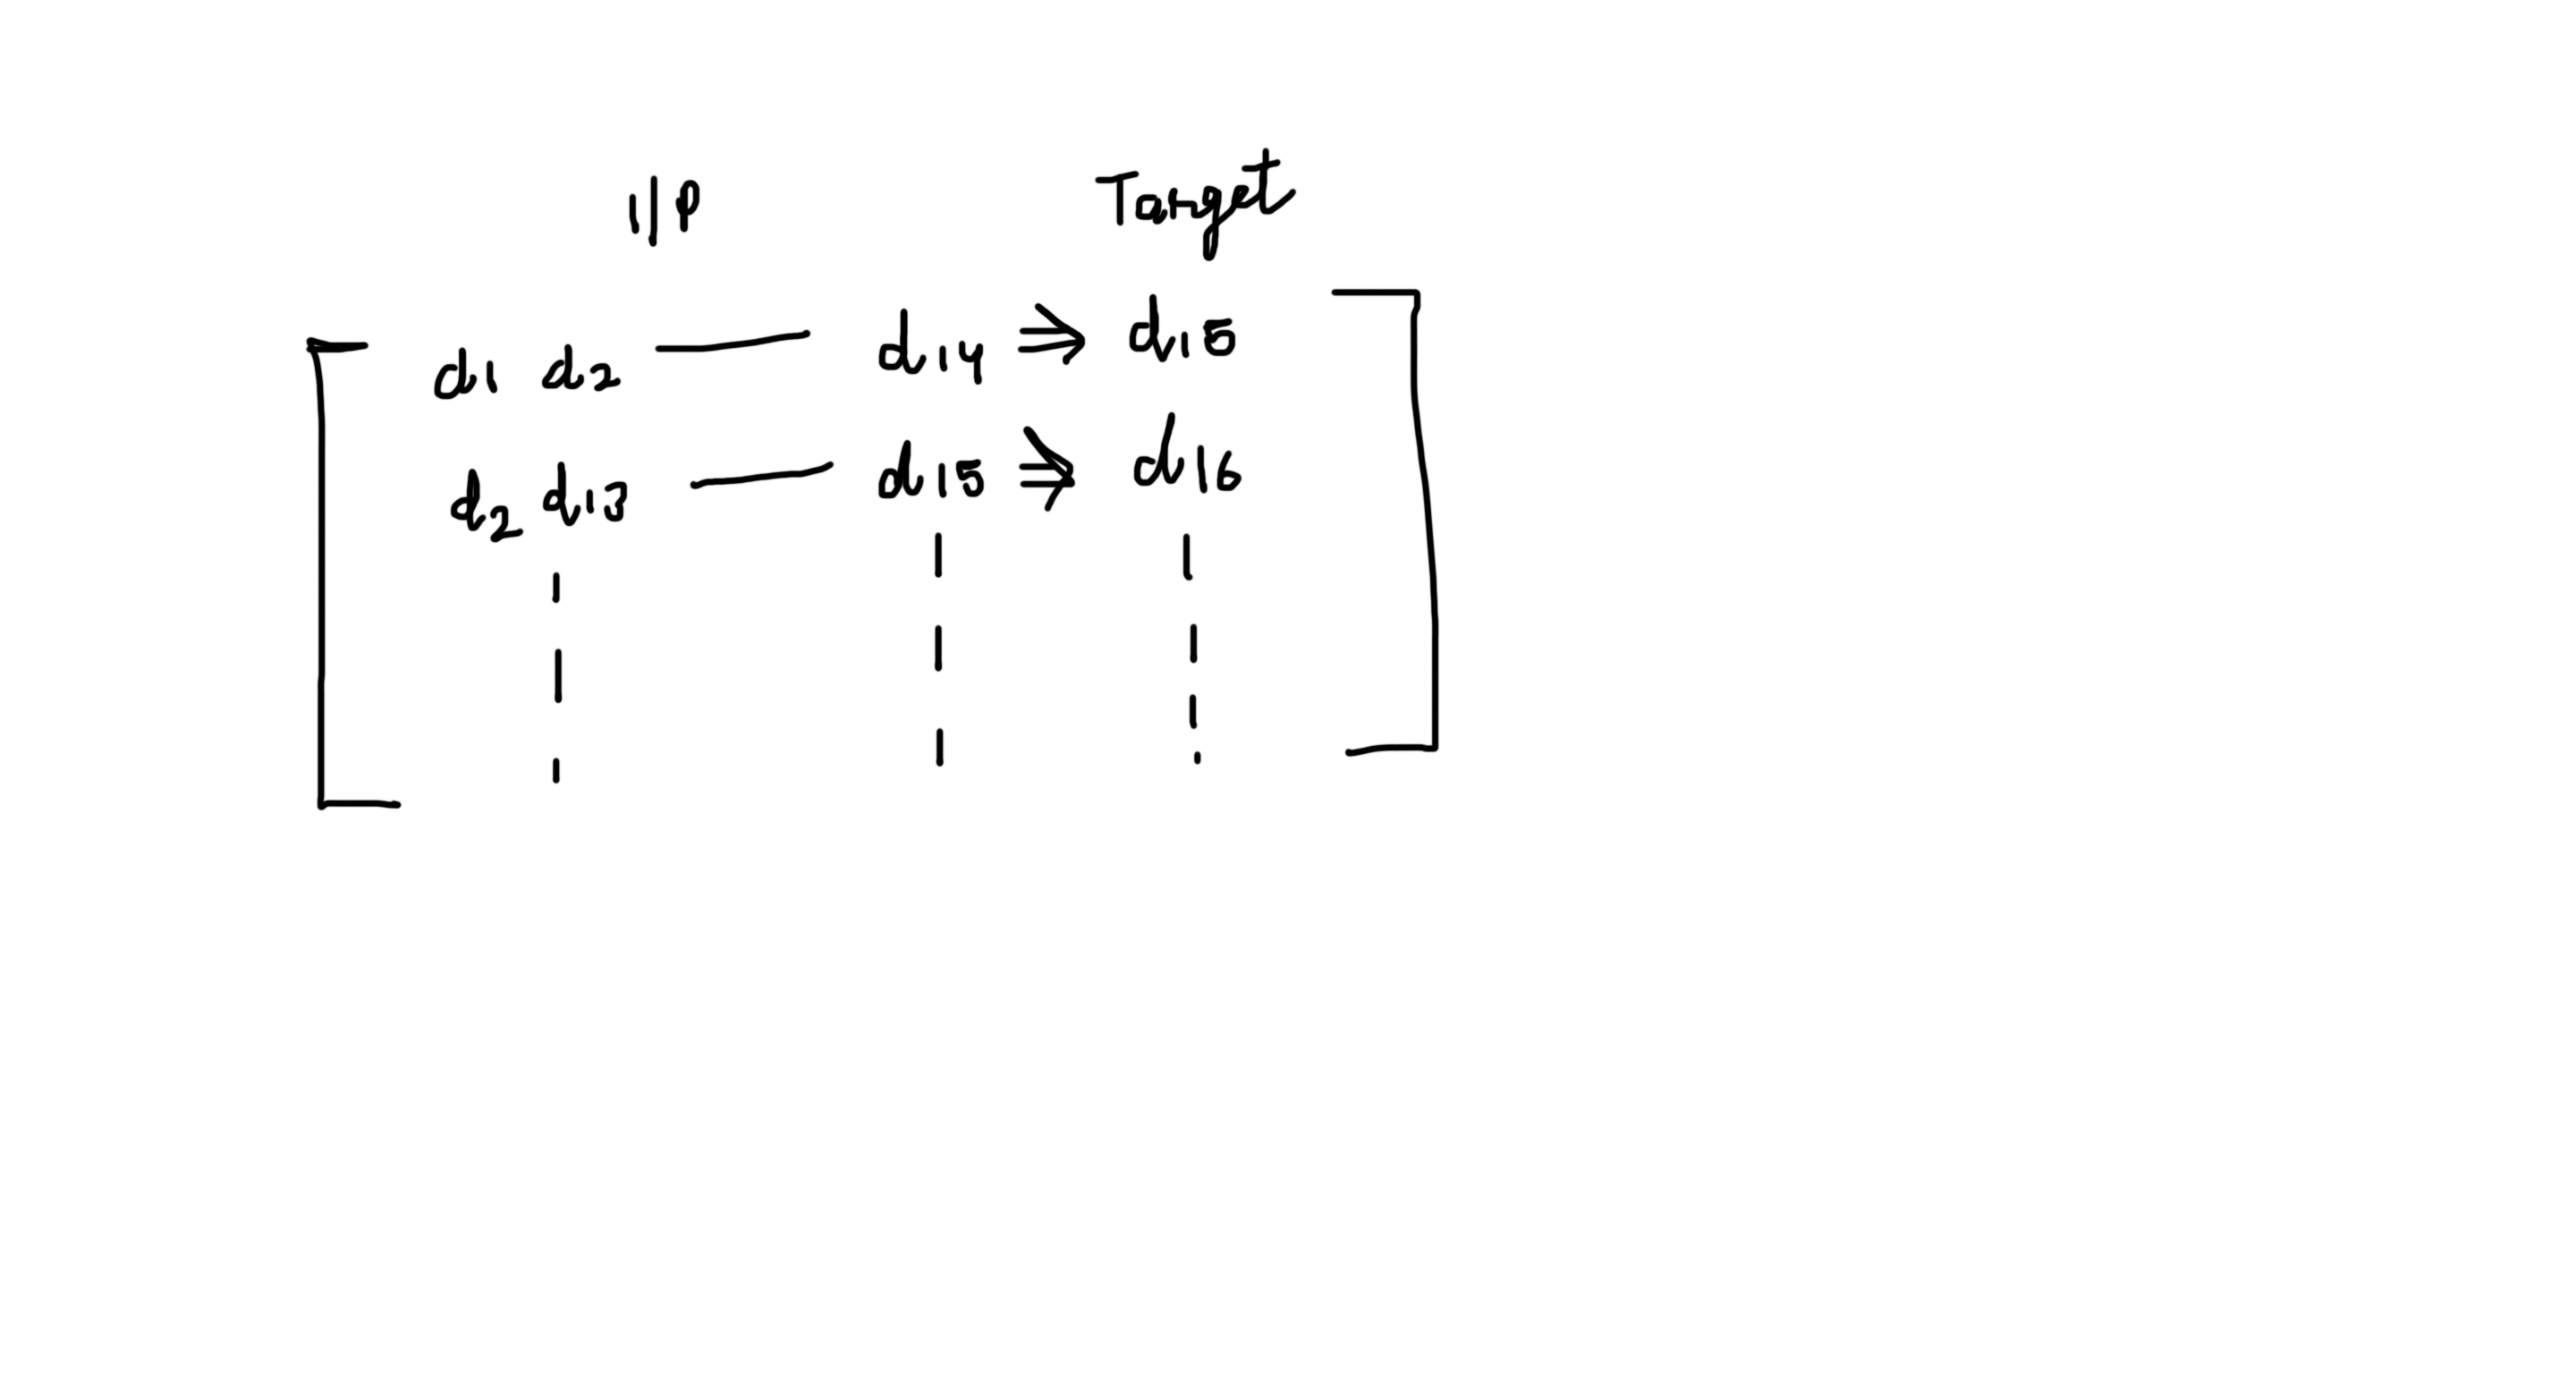

In [12]:
train_df[0:14]

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.3 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.15, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.25, 0.  , 0.  ]])

In [13]:
#train_df[13]

In [14]:
#train_df[13][0:30490]

In [15]:
timesteps=14
X_train = []
y_train = []
for i in range(timesteps, 1913):
    X_train.append(train_df[i-timesteps:i])
    y_train.append(train_df[i][0:30490]) 

In [16]:
X_train = np.array(X_train, dtype = 'float16')
y_train = np.array(y_train, dtype = 'float16')

In [17]:
X_train.shape,y_train.shape

((1899, 14, 30490), (1899, 30490))

# Model Creation

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units =64,input_shape = (np.array(X_train).shape[1], np.array(X_train).shape[2])))
model.add(tf.keras.layers.Dense(30490))

model.compile(
  loss='mean_squared_error',
  optimizer=tf.keras.optimizers.Adam(0.001)
)
model.summary()

2023-06-28 20:24:00.040545: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-28 20:24:00.124308: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                7822080   
                                                                 
 dense (Dense)               (None, 30490)             1981850   
                                                                 
Total params: 9,803,930
Trainable params: 9,803,930
Non-trainable params: 0
_________________________________________________________________


2023-06-28 20:24:00.846287: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-28 20:24:00.847368: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-28 20:24:00.848286: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [19]:
model.fit(X_train, y_train, epochs = 10, batch_size = 10)

2023-06-28 20:24:08.567499: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3242428560 exceeds 10% of free system memory.
2023-06-28 20:24:10.812918: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-28 20:24:10.814097: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-28 20:24:10.815058: I tensorflow/core/common_runtime/executor.cc:1197] [/de

190/190 [==============================] - 39s 200ms/step - loss: 0.0141


In [29]:
inputs= train_df[-timesteps:]
inputs = sc.transform(inputs)

In [30]:
count = 0
result =[]
while count < 28:
    X_test=[]
    X_test.append(inputs[count:])
    #X_test.append(newArray[1:])

    X_test = np.array(X_test)
    predictions=model.predict(X_test)
    reverse_prediction = sc.inverse_transform(predictions)
    result.append(reverse_prediction)
    newArray = np.append(inputs, predictions, axis = 0)
    inputs = newArray
    count = count+1

1/1 [==============================] - 0s 20ms/step


In [61]:
res = np.array(result)
res

array([[[0.80664265, 0.3850186 , 0.32721707, ..., 0.5433613 ,
         0.55757177, 1.6011822 ]],

       [[0.8386943 , 0.41301653, 0.28936204, ..., 0.7987652 ,
         0.6311748 , 1.9417044 ]],

       [[0.8745419 , 0.41444805, 0.29431397, ..., 0.82581306,
         0.62440926, 2.0706928 ]],

       ...,

       [[0.7793077 , 0.34382123, 0.25128815, ..., 1.0452793 ,
         0.5315753 , 1.9213604 ]],

       [[0.7793077 , 0.3438213 , 0.25128812, ..., 1.0452793 ,
         0.5315753 , 1.9213603 ]],

       [[0.7793076 , 0.34382123, 0.25128806, ..., 1.0452794 ,
         0.53157526, 1.9213603 ]]], dtype=float32)

In [76]:
len(res)

28

In [77]:
rsult_dataframe = pd.DataFrame(res[0])

In [78]:
rsult_dataframe

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
0,0.806643,0.385019,0.327217,2.392809,1.099276,0.900476,0.399116,8.893956,0.245324,0.595409,...,1.920884,1.799275,1.684256,1.20919,2.922142,0.631347,0.191434,0.543361,0.557572,1.601182


In [79]:
for days in range(1,len(res)):
    rsult_dataframe.loc[len(rsult_dataframe.index)] = res[days][0]

In [ ]:
#result for 28 days

In [80]:
rsult_dataframe

,0,1,2,3,4,5,6,7,8,9,...,30480,30481,30482,30483,30484,30485,30486,30487,30488,30489
0,0.806643,0.385019,0.327217,2.392809,1.099276,0.900476,0.399116,8.893956,0.245324,0.595409,...,1.920884,1.799275,1.684256,1.209190,2.922142,0.631347,0.191434,0.543361,0.557572,1.601182
1,0.838694,0.413017,0.289362,2.424111,0.993504,0.839185,0.393635,9.583472,0.154344,0.566460,...,1.959412,1.859755,1.757798,1.334239,2.662196,0.835630,0.112620,0.798765,0.631175,1.941704
2,0.874542,0.414448,0.294314,2.514181,0.961623,0.765198,0.389548,9.987253,0.125926,0.531384,...,1.938248,2.038420,1.779866,1.368523,2.495652,0.878751,0.055058,0.825813,0.624409,2.070693
3,0.893635,0.416118,0.298172,2.559056,0.948362,0.695875,0.379985,10.208585,0.112185,0.506877,...,1.865361,2.325944,1.824610,1.381056,2.387353,0.927749,0.047964,0.870223,0.625878,2.155660
4,0.891501,0.406495,0.297609,2.523919,0.924069,0.617866,0.360351,10.264305,0.110613,0.480363,...,1.742221,2.651881,1.857968,1.358319,2.255943,0.979009,0.071241,0.918221,0.623902,2.180562
5,0.874041,0.387826,0.291587,2.443801,0.894952,0.553290,0.339756,10.225037,0.131960,0.459376,...,1.614057,2.932051,1.873255,1.310988,2.138141,1.015651,0.102404,0.968890,0.611211,2.154817
6,0.849431,0.369819,0.281370,2.353652,0.870770,0.515508,0.323693,10.159122,0.164133,0.449048,...,1.514542,3.100699,1.871653,1.259859,2.065299,1.030481,0.135230,1.007798,0.591121,2.100436
7,0.825596,0.357788,0.270785,2.274755,0.852778,0.499392,0.312657,10.093448,0.190857,0.446328,...,1.448877,3.166209,1.860417,1.219447,2.031313,1.029576,0.166768,1.029769,0.571478,2.041658
8,0.806953,0.350909,0.262610,2.216133,0.839546,0.494879,0.305680,10.036794,0.207844,0.446786,...,1.409240,3.174563,1.847665,1.192365,2.019094,1.022259,0.191756,1.040026,0.556189,1.993473
9,0.794428,0.347202,0.257336,2.178290,0.830456,0.495002,0.301643,9.995623,0.217307,0.448002,...,1.386916,3.162518,1.837797,1.176073,2.016653,1.014611,0.208338,1.044060,0.545704,1.960508
